In [2]:
!pip install transformers torch matplotlib

In [3]:
from transformers import pipeline
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
sentiment_analyzer = pipeline("sentiment-analysis")
print("✅ Model loaded successfully!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


✅ Model loaded successfully!


In [5]:
diary_entries = {
    "Monday": "Had a great day at work! My project got approved and the team loved my presentation.",
    "Tuesday": "Feeling a bit stressed. Deadlines are piling up and I couldn't sleep well.",
    "Wednesday": "Okay day. Nothing special happened. Just routine work.",
    "Thursday": "Frustrated with bugs in my code. Spent 3 hours debugging.",
    "Friday": "Amazing! It's finally weekend. Going out with friends tonight!",
    "Saturday": "Relaxing day. Watched movies and ordered pizza. Feeling good.",
    "Sunday": "A bit anxious about Monday's meeting, but overall decent day."
}

print("📝 Diary Entries:")
for day, entry in diary_entries.items():
    print(f"\n{day}: {entry}")

📝 Diary Entries:

Monday: Had a great day at work! My project got approved and the team loved my presentation.

Tuesday: Feeling a bit stressed. Deadlines are piling up and I couldn't sleep well.

Wednesday: Okay day. Nothing special happened. Just routine work.

Thursday: Frustrated with bugs in my code. Spent 3 hours debugging.

Friday: Amazing! It's finally weekend. Going out with friends tonight!

Saturday: Relaxing day. Watched movies and ordered pizza. Feeling good.

Sunday: A bit anxious about Monday's meeting, but overall decent day.


In [6]:
moods = {}

for day, entry in diary_entries.items():
    result = sentiment_analyzer(entry)[0]
    moods[day] = {
        'label': result['label'],
        'score': result['score']
    }

print("\n📊 Mood Analysis:")
print("-" * 50)
for day, mood in moods.items():
    emoji = "😊" if mood['label'] == "POSITIVE" else "😔"
    print(f"{day}: {mood['label']} {emoji} (Confidence: {mood['score']:.2%})")


📊 Mood Analysis:
--------------------------------------------------
Monday: POSITIVE 😊 (Confidence: 99.99%)
Tuesday: NEGATIVE 😔 (Confidence: 99.81%)
Wednesday: NEGATIVE 😔 (Confidence: 99.83%)
Thursday: NEGATIVE 😔 (Confidence: 99.97%)
Friday: POSITIVE 😊 (Confidence: 99.99%)
Saturday: POSITIVE 😊 (Confidence: 99.99%)
Sunday: POSITIVE 😊 (Confidence: 99.90%)


/tmp/ipython-input-3725234335.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


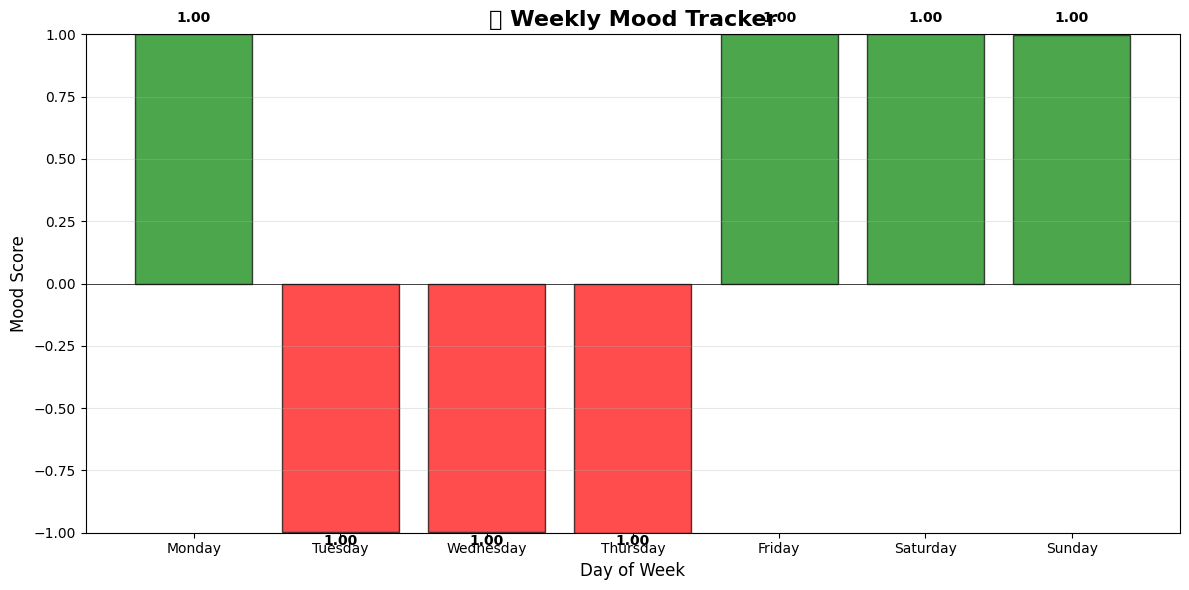


✨ Summary: 4/7 days were positive!


In [7]:
days = list(moods.keys())
mood_scores = []

for day in days:
    score = moods[day]['score']
    if moods[day]['label'] == 'NEGATIVE':
        score = -score
    mood_scores.append(score)

plt.figure(figsize=(12, 6))
colors = ['green' if s > 0 else 'red' for s in mood_scores]
plt.bar(days, mood_scores, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.title('📈 Weekly Mood Tracker', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Mood Score', fontsize=12)
plt.ylim(-1, 1)
plt.grid(axis='y', alpha=0.3)

for i, (day, score) in enumerate(zip(days, mood_scores)):
    plt.text(i, score + 0.05 if score > 0 else score - 0.05,
             f'{abs(score):.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

positive_days = sum(1 for s in mood_scores if s > 0)
print(f"\n✨ Summary: {positive_days}/{len(days)} days were positive!")